In [1]:
import pandas as pd
data=pd.read_csv('../data/Table1_new.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.head(3)

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,read_length,max_read_length_tested,Title,Number_of_Citations,Indexing,...,fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,Application,email - first author,email - last author,Verified,age,citation_per_year
0,43.0,2011,Bismark,https://www.bioinformatics.babraham.ac.uk/proj...,Krueger et al. ‎2011,Ultra-short,50,Bismark: a flexible aligner and methylation ca...,1550,BWT-FM,...,Y,N,N,N,BS-Seq,felix.krueger@bbsrc.ac.uk,NaN,NaN,9,172.222222
1,16.0,2009,BRAT,http://compbio.cs.ucr.edu/brat/,Harris et al. 2009,Ultra-short,26,BRAT: bisulfite-treated reads analysis tool,64,Hashing,...,Y,N,N,N,BS-Seq,elenah@cs.ucr.edu,stefano.lonardi@ucr.edu,NaN,11,5.818182
2,54.0,2012,BRAT-BW,http://compbio.cs.ucr.edu/brat/,Harris et al. 2012,Ultra-short,62,BRAT-BW: efficient and accurate mapping of bis...,70,BWT-FM,...,N,Y,N,N,BS-Seq,elenayharris@gmail.com,stefano.lonardi@ucr.edu,NaN,8,8.750000


In [2]:
idx_rt = pd.read_csv('../data/compare.tools.index.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [4]:
data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment']]
data_year.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memyear = pd.merge(mem, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
memyear.loc[:,'average_memory'] = memyear.iloc[:,1:11].mean(axis=1)
memyear = memyear.loc[memyear.loc[:,'Application'] != 'RNA-Seq']
memyear.loc[memyear.loc[:,'Tools'] == 'Bowtie2','Pairwise_alignment'] = 'NW'
memyear_summ = memyear.loc[:,['Tools', 'Year_of_publication', 'average_memory', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment']]
memyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,11):
    memyear.loc[i,'year_split'] = 'Before 2012' if memyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
memyear_new = pd.melt(memyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memyear_summ

,Tools,Year_of_publication,average_memory,Application,Indexing,Global_Positioning,Pairwise_alignment
8,rmap,2008,9.5320,DNA,Hashing,Seed,HD
1,Bowtie,2009,3.1940,DNA,BWT-FM,Backward Search,HD
2,BWA,2009,5.7110,DNA,BWT-FM,Backward Search,SW
4,gsnap,2010,28.8536,DNA,Hashing,Seed,Non-DP Heuristic
9,smalt,2010,3.6766,DNA,Hashing,Seed,SW
6,last,2011,15.3589,DNA,Suffix Array,Seed,SW
10,snap,2011,36.1000,DNA,Hashing,Seed,NW
0,Bowtie2,2012,3.5799,DNA,BWT-FM,Backward Search,NW
3,ERNE,2016,5.3951,DNA,Hashing,Seed,HD
7,minimap2,2018,12.4488,DNA/RNA-Seq,Hashing,Seed,NW


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

clrs = ['cornflowerblue', 'darkorange', 'limegreen', 'crimson', 'plum', 'peru', 'aquamarine', 
        'pink', 'darkgrey', 'yellowgreen', 'lightcoral', 'gold']

sns.set_style('white')
sns.set_context('talk')

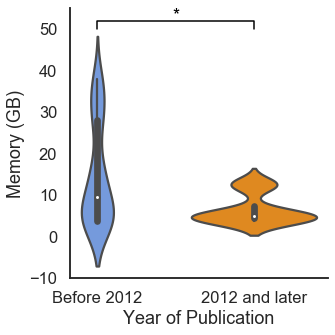

In [9]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['year_split'] == 'Before 2012'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['year_split'] == '2012 and later'].loc[:,'memory'],
                             alternative = 'greater')

ax = sns.catplot(data = memyear_new, x = 'year_split', y = 'memory', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'], palette=clrs)
ax.set(xlabel = 'Year of Publication', ylabel = 'Memory (GB)')
plt.plot([0,0,1,1], [50,52,52,50], lw = 1.5, c = 'k')
plt.text(.5, 51, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Year.png')
plt.savefig('../figures/Memory_by_Year.pdf')

In [10]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(data = memyear_new, x = 'Tools', y = 'memory', scale='width', order=my_order, palette=clrs)
ax.set(xlabel = 'Aligner', ylabel = 'Memory (GB)')
ax.set_xticklabels(rotation=40, ha="right", labels=my_order)

#plt.show()
plt.savefig('../figures/Memory_by_Tool.png')
plt.savefig('../figures/Memory_by_Tool.pdf')

NameError: name 'my_order' is not defined

<Figure size 1080x576 with 0 Axes>

MannwhitneyuResult(statistic=0.0, pvalue=5.03447169901396e-07)


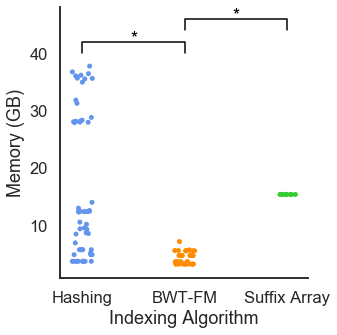

In [13]:
mwu1 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'BWT-FM'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Suffix Array'].loc[:,'memory'],
                             alternative = 'less')

mwu2 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'BWT-FM'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Hashing'].loc[:,'memory'],
                             alternative = 'less')
mwu3 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'Suffix Array'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Hashing'].loc[:,'memory'],
                             alternative = 'two-sided')
print(mwu1)
ax = sns.catplot(data = memyear_new, x = 'Indexing', y = 'memory', order=['Hashing','BWT-FM','Suffix Array'],
                palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Memory (GB)')

plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
plt.text(.5, 41, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
plt.text(1.5, 45, '*', ha = 'center', va = 'bottom', color = 'k')
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Index.png')
plt.savefig('../figures/Memory_by_Index.pdf')

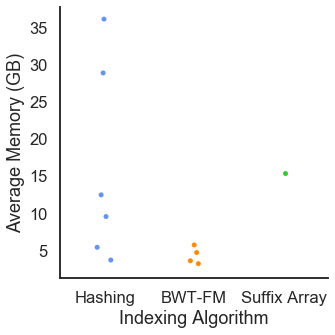

In [14]:
ax = sns.catplot(data = memyear_summ, x = 'Indexing', y = 'average_memory', 
                 order=['Hashing','BWT-FM','Suffix Array'], palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Average Memory (GB)')
#plt.show()

plt.savefig('../figures/Memory_by_Index_avg.png')
plt.savefig('../figures/Memory_by_Index_avg.pdf')

MannwhitneyuResult(statistic=247.0, pvalue=3.771602589601175e-13)


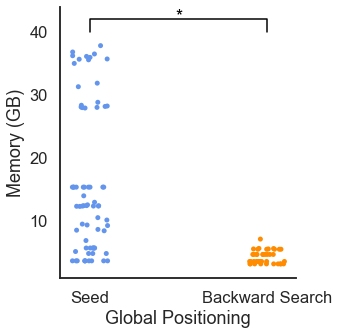

In [15]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Global_Positioning'] == 'Backward Search'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Global_Positioning'] == 'Seed'].loc[:,'memory'],
                             alternative = 'less')

print(mwu)
ax = sns.catplot(data = memyear_new, x = 'Global_Positioning', y = 'memory', order=['Seed','Backward Search'],
                palette=clrs)
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)')
plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
plt.text(.5, 41, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.show()
plt.tight_layout()

plt.savefig('../figures/Memory_by_Global.png')
plt.savefig('../figures/Memory_by_Global.pdf')

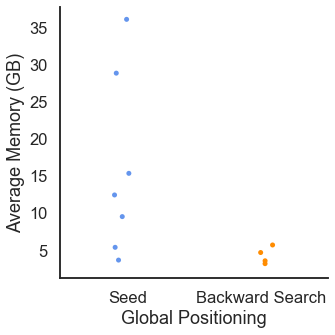

In [16]:
ax = sns.catplot(data = memyear_summ, x = 'Global_Positioning', y = 'average_memory', 
                 order=['Seed','Backward Search'], palette=clrs)
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)')
#plt.show()
plt.savefig('../figures/Memory_by_Global_avg.png')
plt.savefig('../figures/Memory_by_Global_avg.pdf')

In [17]:
ax = sns.violinplot(data = memyear_new, x = 'Pairwise_alignment_2', y = 'memory', hue = 'Global_Positioning', 
                    split=True, scale='count', inner = None, hue_order=['Seed','Backward Search'],
                    order=['Local','Hamming Distance','Global','Non-DP Heuristic','Local & Global'],
                   palette=clrs)

ValueError: Could not interpret input 'Pairwise_alignment_2'

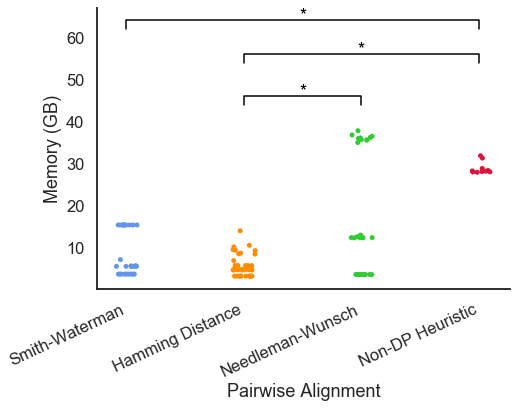

In [18]:
mwu1 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'SW'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'memory'],
                             alternative = 'two-sided')
mwu2 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'memory'],
                             alternative = 'two-sided')
mwu3 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'NW'].loc[:,'memory'],
                             alternative = 'two-sided')
ax = sns.catplot(data = memyear_new, x = 'Pairwise_alignment', y = 'memory',
                    order=['SW','HD','NW','Non-DP Heuristic'],
                   palette=clrs, height=6, aspect=1.25)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
#ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=25, ha="right", labels=['Smith-Waterman','Hamming Distance','Needleman-Wunsch',
                                                    'Non-DP Heuristic'])
plt.plot([0,0,3,3], [62,64,64,62], lw = 1.5, c = 'k')
plt.text(1.5, 63, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,3,3], [54,56,56,54], lw = 1.5, c = 'k')
plt.text(2, 55, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
plt.text(1.5, 45, '*', ha = 'center', va = 'bottom', color = 'k')
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Local.png')
plt.savefig('../figures/Memory_by_Local.pdf')

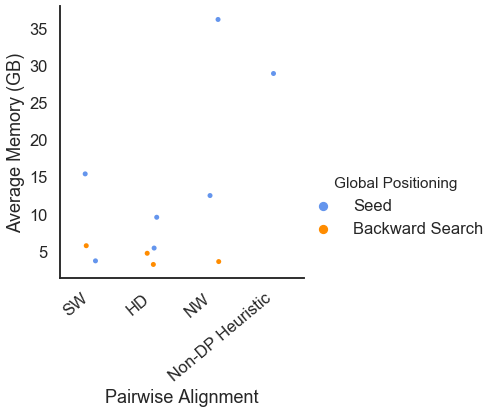

In [19]:
ax = sns.catplot(data = memyear_summ, x = 'Pairwise_alignment', y = 'average_memory', hue = 'Global_Positioning',
                hue_order=['Seed','Backward Search'], 
                 order=['SW','HD','NW','Non-DP Heuristic'],
                palette=clrs)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Average Memory (GB)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
#plt.show()

plt.savefig('../figures/Memory_by_Local_avg.png')
plt.savefig('../figures/Memory_by_Local_avg.pdf')

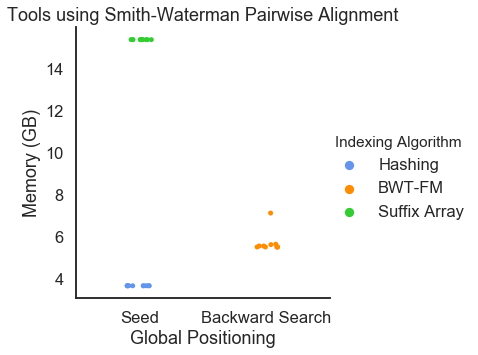

In [20]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Memory_using_Local.png')
plt.savefig('../figures/Memory_using_Local.pdf')

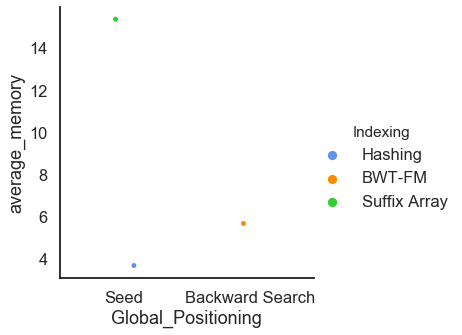

In [21]:
sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'average_memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'], 
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Memory_using_Local_avg.png')
plt.savefig('../figures/Memory_using_Local_avg.pdf')

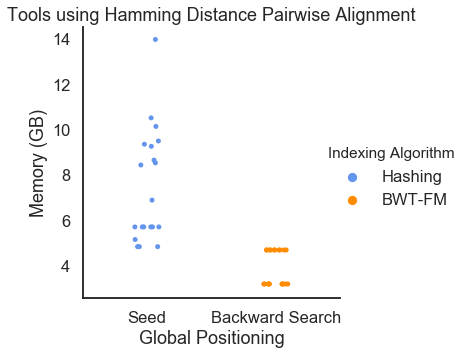

In [22]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Memory_using_HD.png')
plt.savefig('../figures/Memory_using_HD.pdf')


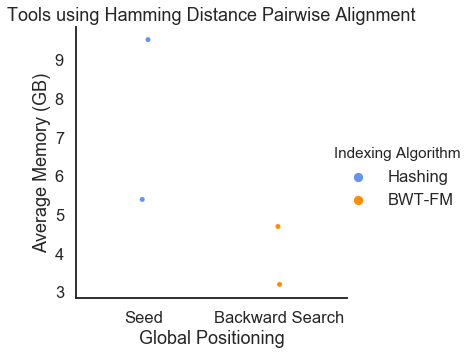

In [23]:
ax = sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'average_memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Memory_using_HD_avg.png')
plt.savefig('../figures/Memory_using_HD_avg.pdf')
